In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import cmath
%matplotlib inline

In [31]:
def yark_acc(x, y, z):    
    L = L_sol*0.000235 # solar luminosity in au^2 M_sol/yr^3

    c = 63197.8 # speed of light in au/yr
    r = np.sqrt(x**2 + y**2 + z**2)
    A = (R**2 * L_sol)/(4*m_mon*c)

    ax = (A/r**3) * (0.25*y + x)
    ay = (A/r**3) * (0.25*x + y)
    az = (A/r**3) * z
    return m_mon*np.sqrt(ax**2 + ay**2 + az**2), np.arctan2(az,np.sqrt(ax**2 + ay**2)), np.arctan2(ay,ax)


def mthm_v(e,v,x0,B,m,a,fifg):
    coeff = fifg*(3/2)*n*(1-e**2)**2
    term1 = (np.cos(v - x0)/(e*(-1+e**2)*np.sqrt(1-e**2)))
    term2 = (3/4)*J2*(Rp/a)**2* n/(1-e**2)**2 * (2 - (5/2)*(np.sin(inc)**2))
    
    period = 11.86 * (a_i / 5.2)**(3/2) * (M_sol)**(1/2)
    term3 = 2*np.pi / period
    return coeff*term1 + term2 - term3

def mthm_e(e,v,x0,B,m,fifg):
    coeff = fifg*(3/2)*n*(1-e**2)**2
    term1 = np.sin(v-x0)/((-1+e**2)*np.sqrt(1-e**2))
    return coeff*term1

def perturb(a, e, v, locs):
    xj,yj,zj = locs
    
    FI, B, x0 = yark_acc(xj, yj, zj)
    FG = G * Mj * m_mon / a**2
    B=0
    ff = FI/FG

    de = mthm_e(e,v,x0,B,v,ff)
    dp = mthm_v(e,v,x0,B,v,a,ff)
    return de, dp

In [32]:
N = 100000
dt = 1
d2 = dt/2

G = 4*np.pi**2       # AU^3/(M_sol * yr^2)
Rp = 4.78e-4
Mj = 9.546e-4        # M_sol
J2 = 1.4736e-2   
rkm = 10             # moon radius in km
R = rkm*6.68e-9      # converts moon radius to AU
v_ast = (rkm**5)**3 * (4/3) * np.pi # volume of moon in cm^3
m_ast = v_ast * (3/1000)              # mass of moon in kg if density ~ 3 g/cm^3
m_mon = m_ast / 1.989e30              # converts moon mass to M_sol
M_sol = 1
L_sol = 1
a_i = 5.2

locs = [a_i,0,0]

num = 500

e = np.zeros((N,num)); p = np.zeros((N,num)) 
de= np.zeros((N,num)); dp= np.zeros((N,num)) 

rhill = 0.3543
randis = np.linspace(0,1000,num)
a = 4 * np.power(10, -2+randis/1000) * rhill
a = np.full(num,0.06)
n = np.sqrt(G*Mj / a**3)
inc = 0
e[0,:] = np.linspace(0,0.9,num)
#e[0,:] = np.full(num,0.2)
#p[0,:] = np.random.uniform(-np.pi,np.pi,size=num)
p[0,:] = np.full(num,0.3)

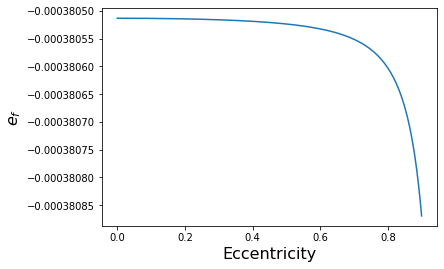

In [33]:
a_vals_moons = np.sort(a)

FY, BBBB, Lammmmy = yark_acc(a_i,0,0)
FG = G * Mj * m_mon / a_vals_moons**2
per = 11.86 * (a_i / 5.2)**(3/2) * (M_sol)**(1/2)
n_p = 2*np.pi/per
p0 = (3/2)*J2*(Rp/a_vals_moons)**2 * n/(1-e[0]**2)**2
eF = 3/2 * (n / (p0 - n_p)) * FY/FG
plt.plot(e[0],eF)
plt.xlabel(r"Eccentricity", fontsize=16)
plt.ylabel(r"$e_f$", fontsize=16)
#plt.yscale("log")
plt.show()

In [34]:
%%time

i = 0 
while i < N-1:
    et, pt = perturb(a, e[i], p[i], locs)
    
    de[i+1] = et; dp[i+1] = pt

    e[i+1] = et*dt + e[i]
    p[i+1] = pt*dt + p[i]

    end = i
    i += 1
    
print(end)

/home/mdodici/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/home/mdodici/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in sin
/home/mdodici/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in cos
  app.launch_new_instance()


99998
CPU times: user 9.97 s, sys: 1.66 s, total: 11.6 s
Wall time: 11.6 s


In [35]:
r_ap = (1 + e)*a
r_pe = (1 - e)*a

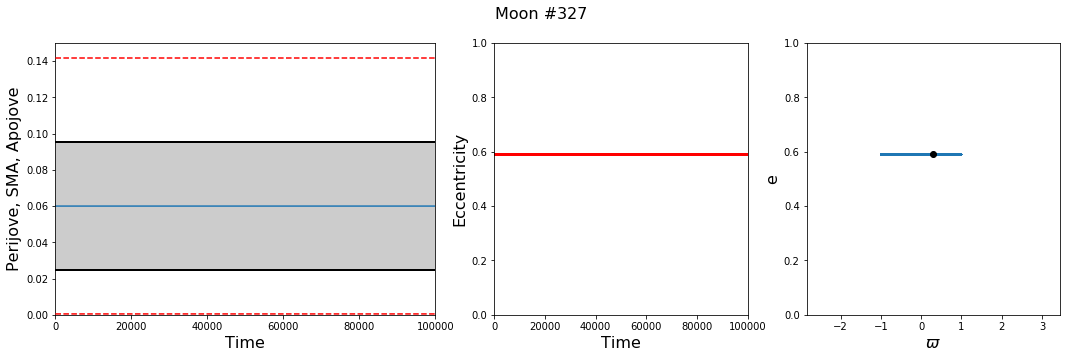

In [36]:
fig, ax = plt.subplots(1,3, figsize=[18,5],gridspec_kw={'width_ratios': [1.5,1,1]})

#foc=489
foc=np.random.randint(0,num-1)
#foc=10
r01=np.linspace(0,1)

ax[0].plot(range(N),np.full(N,a[foc]))
ax[0].fill_between(range(N),(1-e[:,foc])*a[foc],(1+e[:,foc])*a[foc],facecolor='k',alpha=0.2,zorder=0)
ax[0].plot(range(N),(1-e[:,foc])*a[foc],'k')
ax[0].plot(range(N),(1+e[:,foc])*a[foc],'k')
ax[0].plot(range(N),np.full(N,0.4*rhill),'r',ls='--',zorder=10)
ax[0].plot(range(N),np.full(N,Rp),'r',ls='--',zorder=10)

#ax[1].scatter(e[0],a,c=p[0])
ax[1].plot(range(N),e[:,foc],c='red')
#ax[1].plot(r01,np.full(len(r01),0.4*rhill),'r',ls='--',zorder=10)
#ax[1].plot(r01,np.full(len(r01),Rp),'r',ls='--',zorder=10)

ax[2].plot(np.sin(p[:,foc]),e[:,foc])
ax[2].scatter(np.sin(p[0,foc]),e[0,foc],c='k',zorder=10)

ax[0].set_xlabel("Time", fontsize=16)
ax[0].set_xlim(0,N)
ax[0].set_ylabel("Perijove, SMA, Apojove", fontsize=16)
ax[0].set_ylim(0,.15)
ax[1].set_ylabel("Eccentricity", fontsize=16)
ax[1].set_xlabel("Time", fontsize=16)
ax[1].set_ylim(0,1)
ax[1].set_xlim(0,N)
ax[2].set_ylabel("e", fontsize=16)
ax[2].set_ylim(0,1)
ax[2].set_xlim(p[0,foc]-np.pi,p[0,foc]+np.pi)
#ax[2].set_xticks([p[0,foc],p[0,foc]+ np.pi, p[0,foc]+ 2*np.pi])
ax[2].set_xlabel(r"$\varpi$", fontsize=16)

fig.suptitle("Moon #%1.i" %foc, fontsize=16)

"""fige = plt.figure(figsize=(10,10))
axe = fige.add_subplot(projection='polar')

axe.plot(p[:,foc],e[:,foc])
axe.scatter(0,0,c='k')
axe.scatter(p[0,foc],e[0,foc],c='k',zorder=10)
axe.plot(np.full(50,p[0,foc]),np.linspace(0,e[0,foc]),'k')
axe.plot(np.full(50,0),np.linspace(0,1),'k',alpha=0.3,zorder=0)
axe.plot(np.linspace(0,p[0,foc]),np.full(50,e[0,foc]*0.4),'k',alpha=0.3,zorder=0)
axe.grid(False)
axe.set_ylim(0,1)
axe.set_yticks([])
fige.show()"""

fig.show()

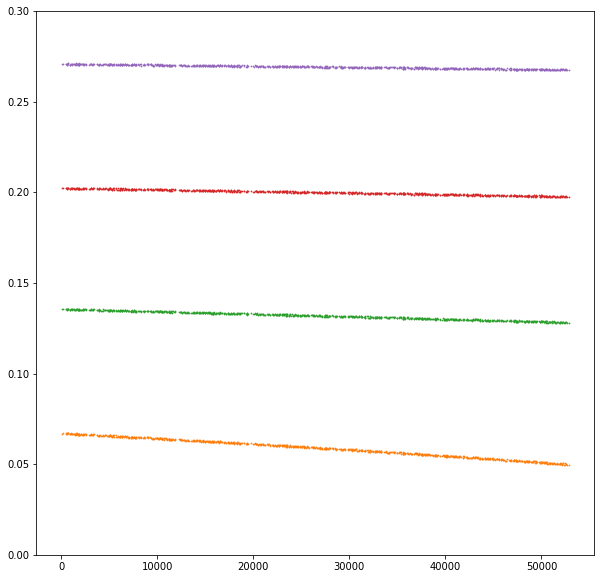

In [37]:
thin = np.random.randint(0,N-1,1000)
thin = np.sort(thin)

foc = np.linspace(0,150,5,dtype='int')
#foc = [38]
fige = plt.figure(figsize=(10,10))
#axe = fige.add_subplot(projection='polar')
axe = fige.add_subplot()

for i,enum in enumerate(foc):
    axe.scatter(abs(p[thin,enum]),e[thin,enum],s=.5)
#axe.scatter(0,0,c='k',zorder=10)
#axe.scatter(p[0,foc],e[0,foc],c='k',zorder=10)
#axe.plot(np.full(50,p[0,foc]),np.linspace(0,e[0,foc]),'k')
#axe.plot(np.full(50,0),np.linspace(0,1),'k',alpha=0.3,zorder=0)
#axe.plot(np.full(50,np.pi/2),np.linspace(0,1),'k',alpha=0.3,zorder=0)
#axe.plot(np.full(50,np.pi),np.linspace(0,1),'k',alpha=0.3,zorder=0)
#axe.plot(np.full(50,3*np.pi/2),np.linspace(0,1),'k',alpha=0.3,zorder=0)
#axe.plot(np.linspace(0,p[0,foc]),np.full(50,e[0,foc]*0.4),'k',alpha=0.3,zorder=0)
axe.grid(False)
axe.set_ylim(0,.3)
#axe.set_xlim(-1,1)
#axe.set_yticks()
fige.show()

In [20]:
amax = 0.4*rhill
pmin = Rp

crosser = []
crasher = []
for i in range(num):
    it = 0
    while it < N-1:
        a_focus = r_ap[it,i]
        p_focus = r_pe[it,i]
        if p_focus < 2*pmin:
            crasher.append(i)
            break
        if a_focus > amax:
            crosser.append(i)
            break
        else:
            it += 1
            
print(len(crosser))
print(len(crasher))

KeyboardInterrupt: 

When $a$ is high enough, the value of $e_f$ (the center of the ring in $h$-$k$ or $e$-$\varpi$ space) is raised to such a point that any moon will eventually have a high enough eccentricity that its apocenter will be beyond $0.4\;r_{Hill}$ from the planet.

In [37]:
coidx = np.array(crosser)
caidx = np.array(crasher)
idx = crosser + crasher

a_safe = np.delete(a,idx)
e_safe = np.delete(e,idx,axis=1)
p_safe = np.delete(p,idx,axis=1)

a_cros = a[coidx]; e_cros = e[:,coidx]; p_cros = p[:,coidx]
a_cras = a[caidx]; e_cras = e[:,caidx]; p_cras = p[:,caidx]

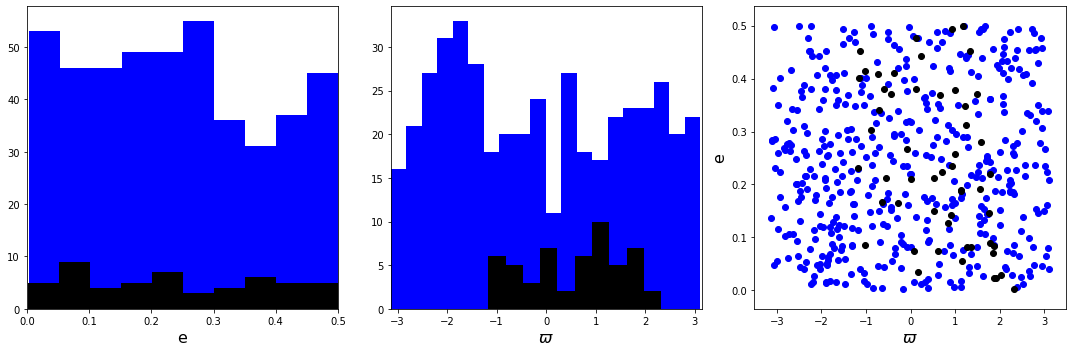

In [49]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].hist(e_safe[0],facecolor='k',zorder=10)
#ax[0].scatter(e_cros[0],a_cros,c='r')
ax[0].hist(e_cras[0],facecolor='b',zorder=0)
ax[0].set_xlabel('e',fontsize=16)
#ax[0].set_ylabel('a',fontsize=16)
#ax[0].set_ylim(0.004,.15)
#ax[0].set_yscale('log')
ax[0].set_xlim(0,0.5)

ax[1].hist(p_safe[0],facecolor='k')
#ax[1].scatter(p_cros[0],a_cros,c='r')
ax[1].hist(p_cras[0],bins=20,facecolor='b',zorder=0)
ax[1].set_xlabel(r"$\varpi$",fontsize=16)
#ax[1].set_ylabel('a',fontsize=16)
#ax[1].set_ylim(0.004,.15)
#ax[1].set_yscale('log')
ax[1].set_xlim(-np.pi,np.pi)

ax[2].scatter(p_safe[0],e_safe[0],c='k',zorder=10)
#ax[2].scatter(p_cros[0],e_cros[0],c='r')
ax[2].scatter(p_cras[0],e_cras[0],c='b')
ax[2].set_xlabel(r"$\varpi$",fontsize=16)
ax[2].set_ylabel('e',fontsize=16)

fig.tight_layout()
fig.show()

In [38]:
L = 1 - np.sqrt(1-e**2)
h = np.sqrt(2*L) * np.cos(p)
k = np.sqrt(2*L) * np.sin(p)

/home/mdodici/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in cos
  
/home/mdodici/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sin
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
import mpl_toolkits.mplot3d
thin = np.linspace(0,len(h)-1,dtype='int')

Starting Eccentricities
Blue:   0.18
Green:  0.36
Red:    0.54
Purple: 0.72
Grey:   0.90


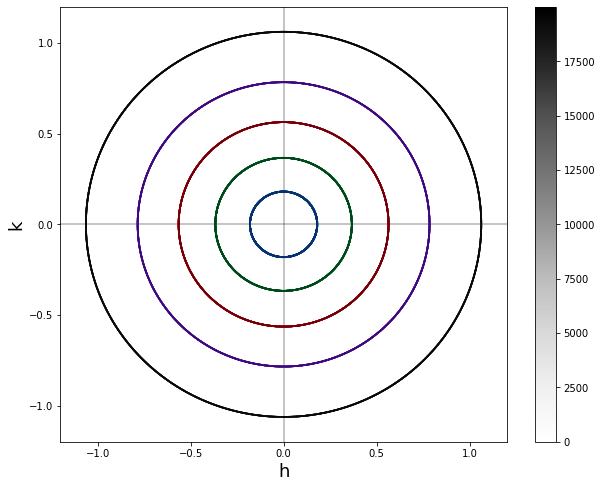

In [39]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()

#it=0
#while it < 200:
colors = ['Blues','Greens','Reds','Purples','Greys','brown','black']
for i,it in enumerate([100,200,300,400,499]):
    axe = ax.scatter(h[:20000,it], k[:20000,it], c=range(20000),cmap=colors[i],s=.5)
    
fig.colorbar(axe)
#    it += 1
#ax.set_aspect('equal')
#ax.plot(np.zeros(50),np.linspace(-1,1),'k',zorder=0)
#ax.plot(np.linspace(-1,1),np.zeros(50),'k',zorder=0)
ax.set_ylabel('k',fontsize=18)
ax.set_xlabel('h',fontsize=18)
ax.plot(np.full(50,0),np.linspace(-1.2,1.2),'k',alpha=.3,zorder=0)
ax.plot(np.linspace(-1.2,1.2),np.full(50,0),'k',alpha=.3,zorder=0)
ax.set_ylim(-1.2,1.2)
ax.set_xlim(-1.2,1.2)
#ax.set_zlabel('a',fontsize=18)
#ax.grid(True)
#ax.set_xticks([0])
#ax.set_yticks([0])
#ax.set_zticks([0])
fig.show()

print('Starting Eccentricities')
print('Blue:   %1.2f' %e[0,100])
print('Green:  %1.2f' %e[0,200])
print('Red:    %1.2f' %e[0,300])
print('Purple: %1.2f' %e[0,400])
print('Grey:   %1.2f' %e[0,499])

Conclusion: the only thing fundamentally different between the three effects in $h$-$k$ space is the tilt signifying $x_0$ -- this can be attributed to differences in how the force is distributed, and if we took into account effects of the force at different times in the planet's orbit it might look different